# GEO1003 ~ Wi-Fi Fingerprinting

December 2023

Work by Tom Barbian (5100704), Der Derian Auliyaa Bainus (5941342), Corné Snoeij (5174473), Javier Martínez (6055613)

### Importing libraries

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import contextily as ctx

### Loading the data

##### Wi-Fi fingerprinting data

In [24]:
# load the files within folder /data/fingerprints into a list
wifi_path = os.getcwd() + '/data/fingerprints'
wifi_files = os.listdir(wifi_path)
wifi_files

['Ketelhuis side room.txt',
 'Serre 2023-12-08 10-53-11.txt',
 'Hall H 2023-12-11 12-51-23 .txt',
 'HALL D.txt',
 'entrance west.txt',
 'HALL R.txt',
 'BG+ half-floor.txt',
 'BK library 2023-12-11-13-41.txt',
 'Geolab 2023-12-08 09-11-59.txt',
 'Stairway (near Hall U) 2023-12-12 12-59-18.txt',
 'V 2023-12-08 09-42-29.txt',
 'management stairs.txt',
 'Hall Z 2023-12-12 13-22-50.txt',
 'Msc 2023-12-08 10-14-01.txt',
 'Hall K 2023-12-12 12-32-57.txt',
 'vrlab.txt']

In [25]:
# load the files into a list of dataframes
df_dict = {}

for file in wifi_files:
    df_dict[file] = pd.read_csv(wifi_path + '/' + file, sep='\t', header=0)

In [26]:
df_dict["BG+ half-floor.txt"]

,12/13/2023 3:54:32 PM,MAC Address,Vendor,SSID,Access Point Name,Connected AP,Signal Strength,Quality,Station Count,Frequency,Position,Info,Adapter
0,12/13/2023 3:54:33 PM,1C:28:AF:66:4C:D1,NaN,tudelft-dastud,NaN,NaN,-83,31,0.0,Ch 165 [5.825 GHz],NaN,"0 Stations, 1% Channel Utilization",Wi-Fi [Intel(R) Wireless-AC 9560 160MHz]
1,12/13/2023 3:54:33 PM,1C:28:AF:66:4C:D0,NaN,eduroam,NaN,NaN,-84,29,2.0,Ch 165 [5.825 GHz],NaN,"2 Stations, 1% Channel Utilization",Wi-Fi [Intel(R) Wireless-AC 9560 160MHz]
2,12/13/2023 3:54:33 PM,D0:4D:C6:F2:9D:F2,NaN,TUD-facility,NaN,NaN,-80,38,0.0,Ch 108 [5.540 GHz],NaN,"0 Stations, 69% Channel Utilization",Wi-Fi [Intel(R) Wireless-AC 9560 160MHz]
3,12/13/2023 3:54:33 PM,D0:4D:C6:F2:61:21,NaN,tudelft-dastud,NaN,NaN,-56,85,0.0,Ch 6 [2.437 GHz],NaN,"0 Stations, 34% Channel Utilization",Wi-Fi [Intel(R) Wireless-AC 9560 160MHz]
4,12/13/2023 3:54:33 PM,1C:28:AF:66:2A:B1,NaN,tudelft-dastud,NaN,NaN,-85,26,0.0,Ch 149 [5.745 GHz],NaN,"0 Stations, 4% Channel Utilization",Wi-Fi [Intel(R) Wireless-AC 9560 160MHz]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14475,12/13/2023 4:09:46 PM,1C:28:AF:62:01:C1,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-73,60,0.0,Ch 1 [2.412 GHz],NaN,"0 Stations, 24% Channel Utilization",Wi-Fi [Intel(R) Wireless-AC 9560 160MHz]
14476,12/13/2023 4:09:46 PM,6C:B7:49:E9:C9:A9,"HUAWEI TECHNOLOGIES CO.,LTD",Honor 7X,NaN,NaN,-68,72,1.0,Ch 1 [2.412 GHz],NaN,"1 Station, 0% Channel Utilization",Wi-Fi [Intel(R) Wireless-AC 9560 160MHz]
14477,12/13/2023 4:09:46 PM,1C:28:AF:66:11:D2,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-87,22,0.0,Ch 157 [5.785 GHz],NaN,"0 Stations, 1% Channel Utilization",Wi-Fi [Intel(R) Wireless-AC 9560 160MHz]
14478,12/13/2023 4:09:46 PM,D0:4D:C6:F2:61:31,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-59,83,0.0,Ch 136 [5.680 GHz],NaN,"0 Stations, 6% Channel Utilization",Wi-Fi [Intel(R) Wireless-AC 9560 160MHz]


In [27]:
df_dict['Stairway (near Hall U) 2023-12-12 12-59-18.txt']

,12/12/2023 12:59:18,MAC Address,Vendor,SSID,Access Point Name,Connected AP,Signal Strength,Quality,Station Count,Frequency,Position,Info,Adapter
0,12/12/2023 12:59:23,1C:28:AF:5C:42:82,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-75,53,0.0,Ch 6 [2.437 GHz],NaN,"0 Stations, 41% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
1,12/12/2023 12:59:23,1C:28:AF:5C:42:81,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-75,53,0.0,Ch 6 [2.437 GHz],NaN,"0 Stations, 41% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
2,12/12/2023 12:59:23,D0:4D:C6:F2:50:12,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-80,38,0.0,Ch 36 [5.180 GHz],NaN,"0 Stations, 17% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
3,12/12/2023 12:59:23,D0:4D:C6:F2:50:11,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-81,35,0.0,Ch 36 [5.180 GHz],NaN,"0 Stations, 17% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
4,12/12/2023 12:59:23,CE:D1:61:6E:C4:FD,NaN,Galaxy A71C509,NaN,NaN,-75,53,NaN,Ch 6 [2.437 GHz],NaN,NaN,WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12698,12/12/2023 13:16:41,1C:28:AF:5C:42:92,"Aruba, a Hewlett Packard Enterprise Company",TUD-facility,NaN,NaN,-87,22,0.0,Ch 64 [5.320 GHz],NaN,"0 Stations, 7% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
12699,12/12/2023 13:16:41,1C:28:AF:5C:42:91,"Aruba, a Hewlett Packard Enterprise Company",tudelft-dastud,NaN,NaN,-87,22,0.0,Ch 64 [5.320 GHz],NaN,"0 Stations, 7% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
12700,12/12/2023 13:16:41,1C:28:AF:5C:42:90,"Aruba, a Hewlett Packard Enterprise Company",eduroam,NaN,NaN,-88,20,11.0,Ch 64 [5.320 GHz],NaN,"11 Stations, 7% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]
12701,12/12/2023 13:16:41,1C:28:AF:5B:E9:B0,"Aruba, a Hewlett Packard Enterprise Company",eduroam,NaN,NaN,-89,18,15.0,Ch 100 [5.500 GHz],NaN,"15 Stations, 13% Channel Utilization",WiFi [Intel(R) Wi-Fi 6E AX211 160MHz]


##### GNSS nmea data

In [48]:
# This function was coded by Lars, but modified to save to dataframe

def get_sat_values(filename):
    PDOP, HDOP, VDOP, latitude, longitude, num_used_satellites, altitude = [], [], [], [], [], [], []

    with open(filename, 'r') as file:
        lines = file.readlines()
        # divide messages
        messages = [lines[i:i + 7] for i in range(0, len(lines), 7)]

        for message in messages:
            PDOP.append(float(message[0].split(',')[15]))
            HDOP.append(float(message[0].split(',')[16]))
            VDOP.append(float(message[0].split(',')[17][:3]))
            latitude.append(float(message[6].split(',')[2:3][0]))
            longitude.append(float(message[6].split(',')[4:5][0]))
            num_used_satellites.append(int(message[6].split(',')[6]))
            altitude.append(float(message[6].split(',')[9:10][0]))

    # Create a DataFrame
    df = pd.DataFrame({
        'PDOP': PDOP,
        'HDOP': HDOP,
        'VDOP': VDOP,
        'latitude': latitude,
        'longitude': longitude,
        'num_used_satellites': num_used_satellites,
        'altitude': altitude
    })

    return df

In [49]:
# load the files within folder /data/fingerprints into a list
nmea_path = os.getcwd() + '/data/nmea'
nmea_files = os.listdir(nmea_path)
nmea_files

['Hall H nmea.log',
 'Stairway (near Hall U) nmea.log',
 'Hall Z nmea.log',
 'Hall K nmea.log']

In [77]:
# load the nmea files into a list of dataframes
nmea_dict = {}

for file in nmea_files:
    nmea_dict[file] = get_sat_values(nmea_path + '/' + file)
    # divide latitude and longitude by 100 to get the correct value
    nmea_dict[file]['latitude'] = nmea_dict[file]['latitude'] / 100
    nmea_dict[file]['longitude'] = nmea_dict[file]['longitude'] / 100

In [78]:
nmea_dict['Hall K nmea.log']

,PDOP,HDOP,VDOP,latitude,longitude,num_used_satellites,altitude
0,11.2,10.5,3.8,52.003689,4.222611,12,1.1
1,7.7,7.0,3.2,52.003696,4.222625,12,1.0
2,7.5,7.0,2.8,52.003697,4.222627,12,1.0
3,7.5,7.0,2.6,52.003697,4.222627,12,1.1
4,7.4,7.0,2.3,52.003697,4.222627,12,1.0
...,...,...,...,...,...,...,...
166,7.0,7.0,0.5,52.003688,4.222605,12,1.3
167,7.0,7.0,0.5,52.003692,4.222613,12,1.3
168,7.0,7.0,0.5,52.003701,4.222623,12,1.3
169,7.0,7.0,0.5,52.003701,4.222625,12,1.3


### A. Radio Mapping Phase

BK-City floor plan can be found [here.](https://www.tudelft.nl/bk/over-faculteit/het-gebouw/plattegrond/)

##### A1. Scatterplots of GNSS accuracy

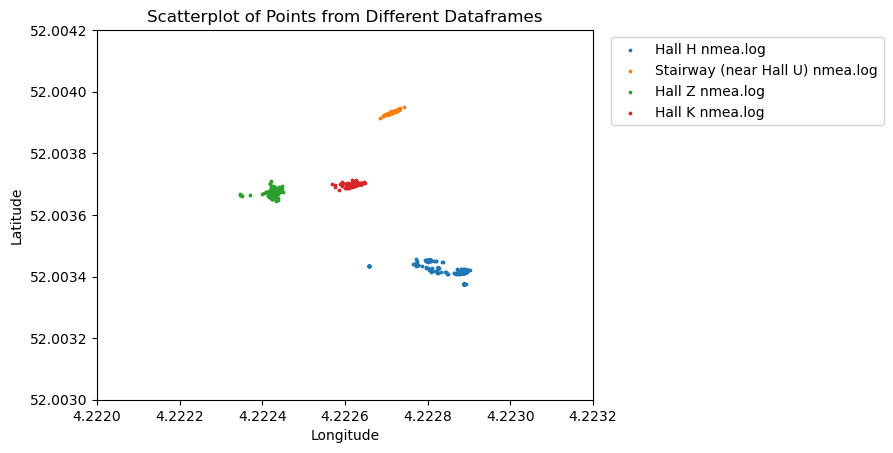

In [103]:
# plot latitude and longitude for each of the nmea files in one scatterplot with different colors
for key, df in nmea_dict.items():
    plt.scatter(df['longitude'], df['latitude'], label=key, s=3)

# Adding basemap using contextily
#ctx.add_basemap(plt, crs='epsg:4326', source=ctx.providers.Esri.WorldImagery, zoom=21)

plt.xlim(4.222, 4.2232)
plt.ylim(52.003, 52.0042)

plt.ticklabel_format(useOffset=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatterplot of Points from Different Dataframes')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))

# Show the plot
plt.show()